## Importing required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scikitplot as skl
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

## Loading the dataset

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- It seems that there are no missing values in the dataset.

## Data Visualization

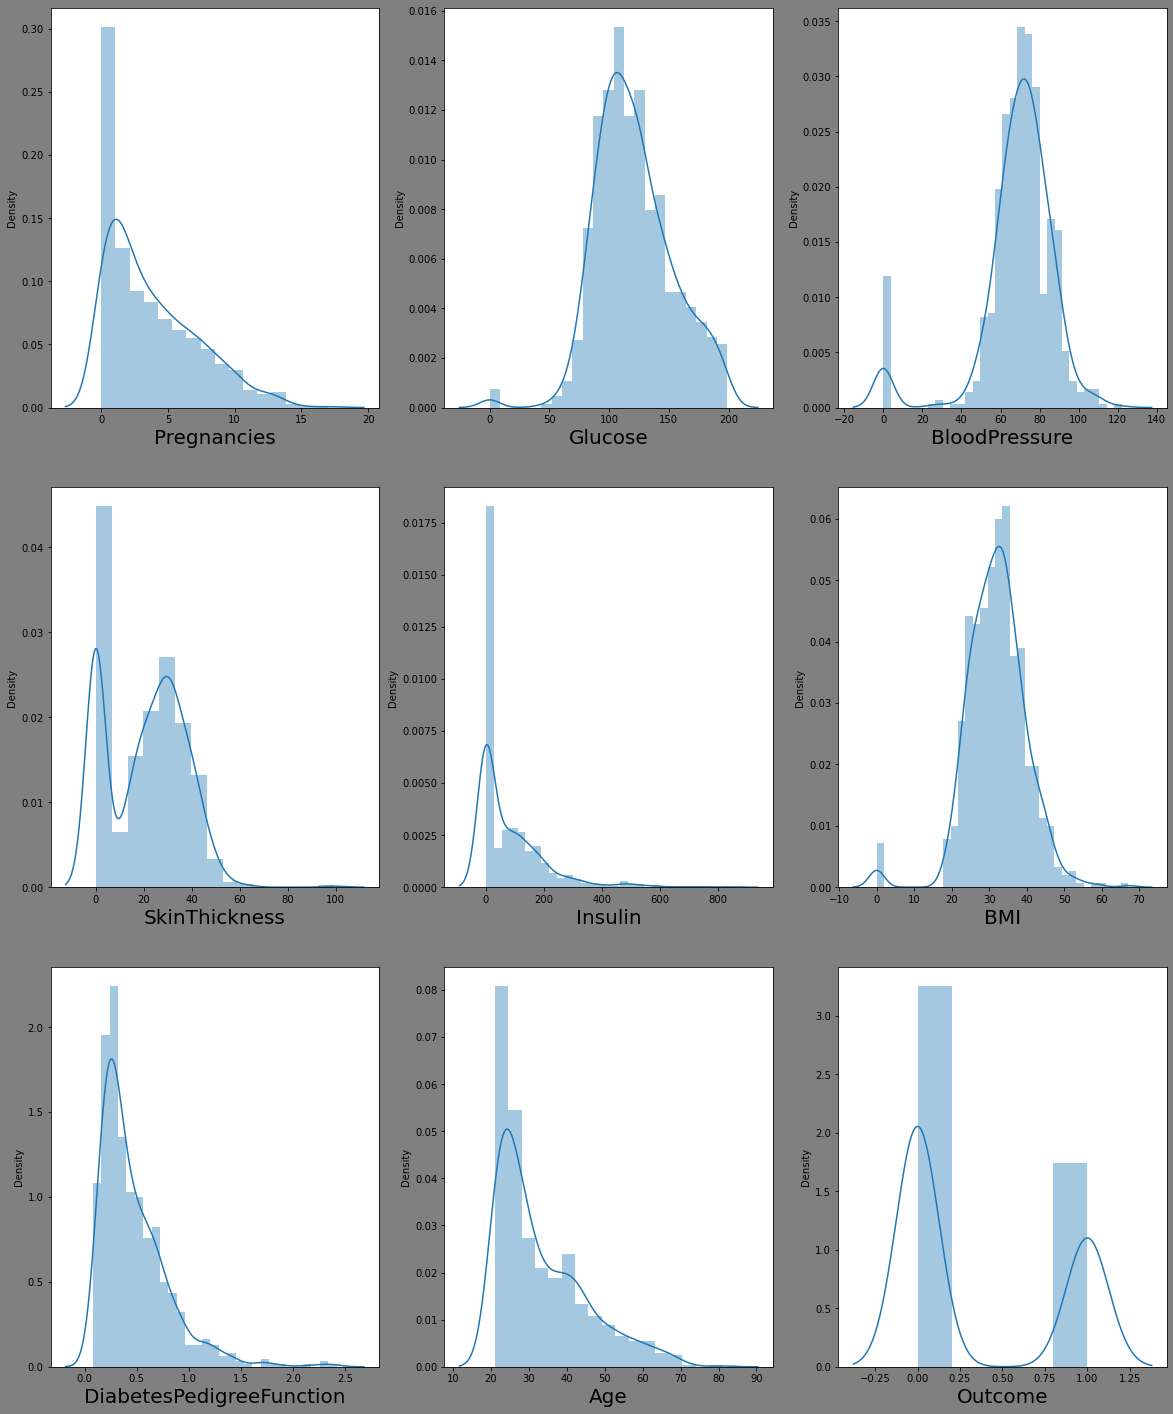

In [4]:
# Check the data distribution
plt.figure(figsize = (20, 25), facecolor = 'grey')
plt_no = 1
for column in data:
    if plt_no <= 9:
        ax = plt.subplot(3, 3, plt_no)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plt_no += 1
plt.show()

- We can see there is some skewness in the data.
- Also, we can see there few data for columns `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, and `BMI` have values as 0. These column data cannot have 0 values. Let's deal with that either by removing such data or simply replace it with their respective mean values.

In [5]:
# replacing the zero values with the mean values of the column
data['Glucose'] = data['Glucose'].replace(0, data["Glucose"].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0, data["BloodPressure"].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0, data["SkinThickness"].mean())
data['Insulin'] = data['Insulin'].replace(0, data["Insulin"].mean())
data['BMI'] = data['BMI'].replace(0, data["BMI"].mean())

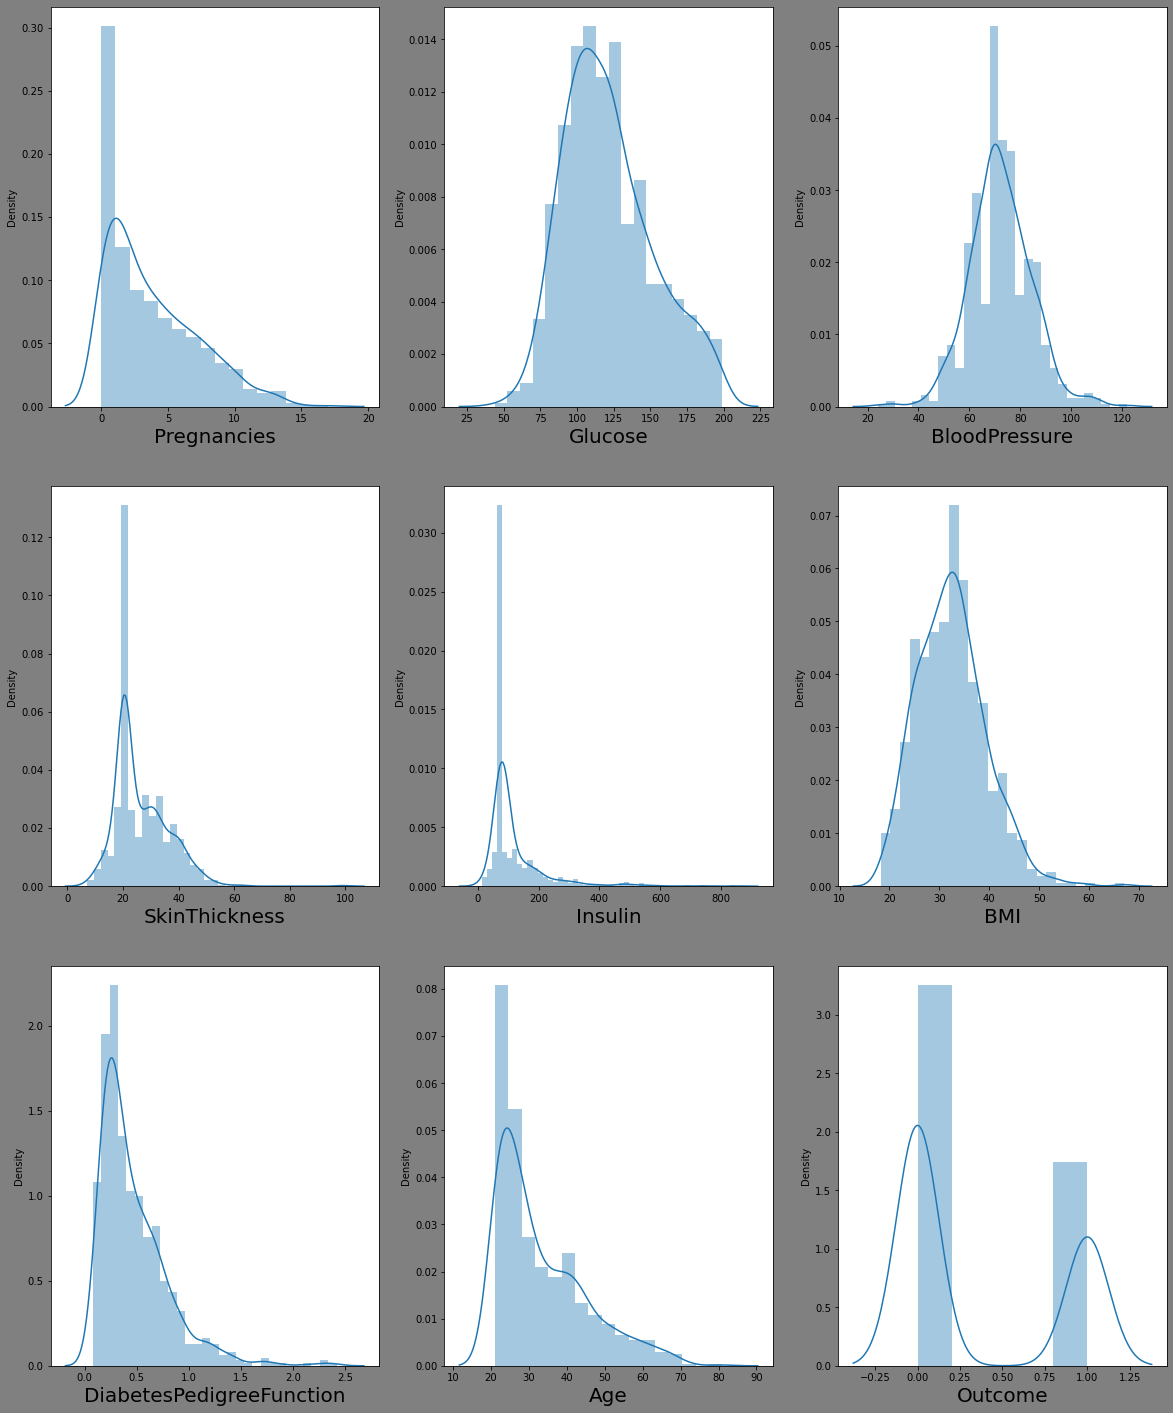

In [6]:
# Check the data distribution for every column
plt.figure(figsize = (20, 25), facecolor = 'grey')
plt_no = 1
for column in data:
    if plt_no <= 9:
        ax = plt.subplot(3, 3, plt_no)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    plt_no += 1
plt.show()

- As we have dealt with the 0 values, the data looks better.
- It seems there are some outliers present in some columns, let's deal with them.

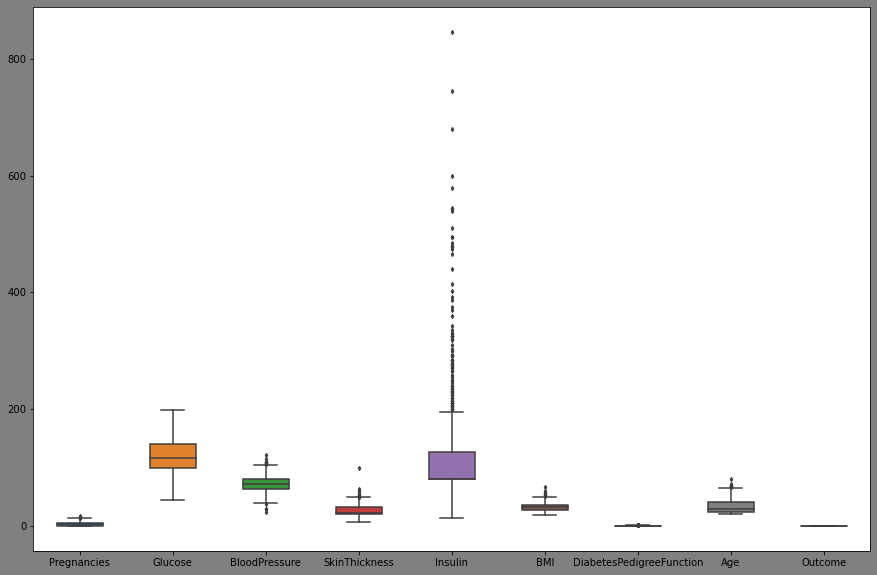

In [7]:
fig, ax = plt.subplots(figsize = (15, 10), facecolor = 'grey')
sns.boxplot(data = data, width = 0.5, ax = ax, fliersize = 3)

- From above plot we can see that columns like `Insulin`, `SkinThickness`, `BMI`, 'Age`, `BloodPressure` and `Pregnancies` are having outliers.
- Out of all these `Insulin` has the highest amount of outliers.
- We will handle the outliers problem by dropping those values, it is possible we may lose some of the data.

In [8]:
# removing the top 2% data from the Pregnanices column
q = data['Pregnancies'].quantile(0.98)
data_cleaned = data[data['Pregnancies'] < q]

# removing the top 1% data from the BMI column
q = data['BMI'].quantile(0.99)
data_cleaned = data[data['BMI'] < q]

# removing the top 1% data from the SkinThickness column
q = data['SkinThickness'].quantile(0.99)
data_cleaned = data[data['SkinThickness'] < q]

# removing the top 5% data from the Insulin column
q = data['Insulin'].quantile(0.95)
data_cleaned = data[data['Insulin'] < q]

# removing the top 1% data from the DiabetesPedigreeFunction column
q = data['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned = data[data['DiabetesPedigreeFunction'] < q]

# removing the top 1% data from the Age column
q = data['Age'].quantile(0.99)
data_cleaned = data[data['Age'] < q]

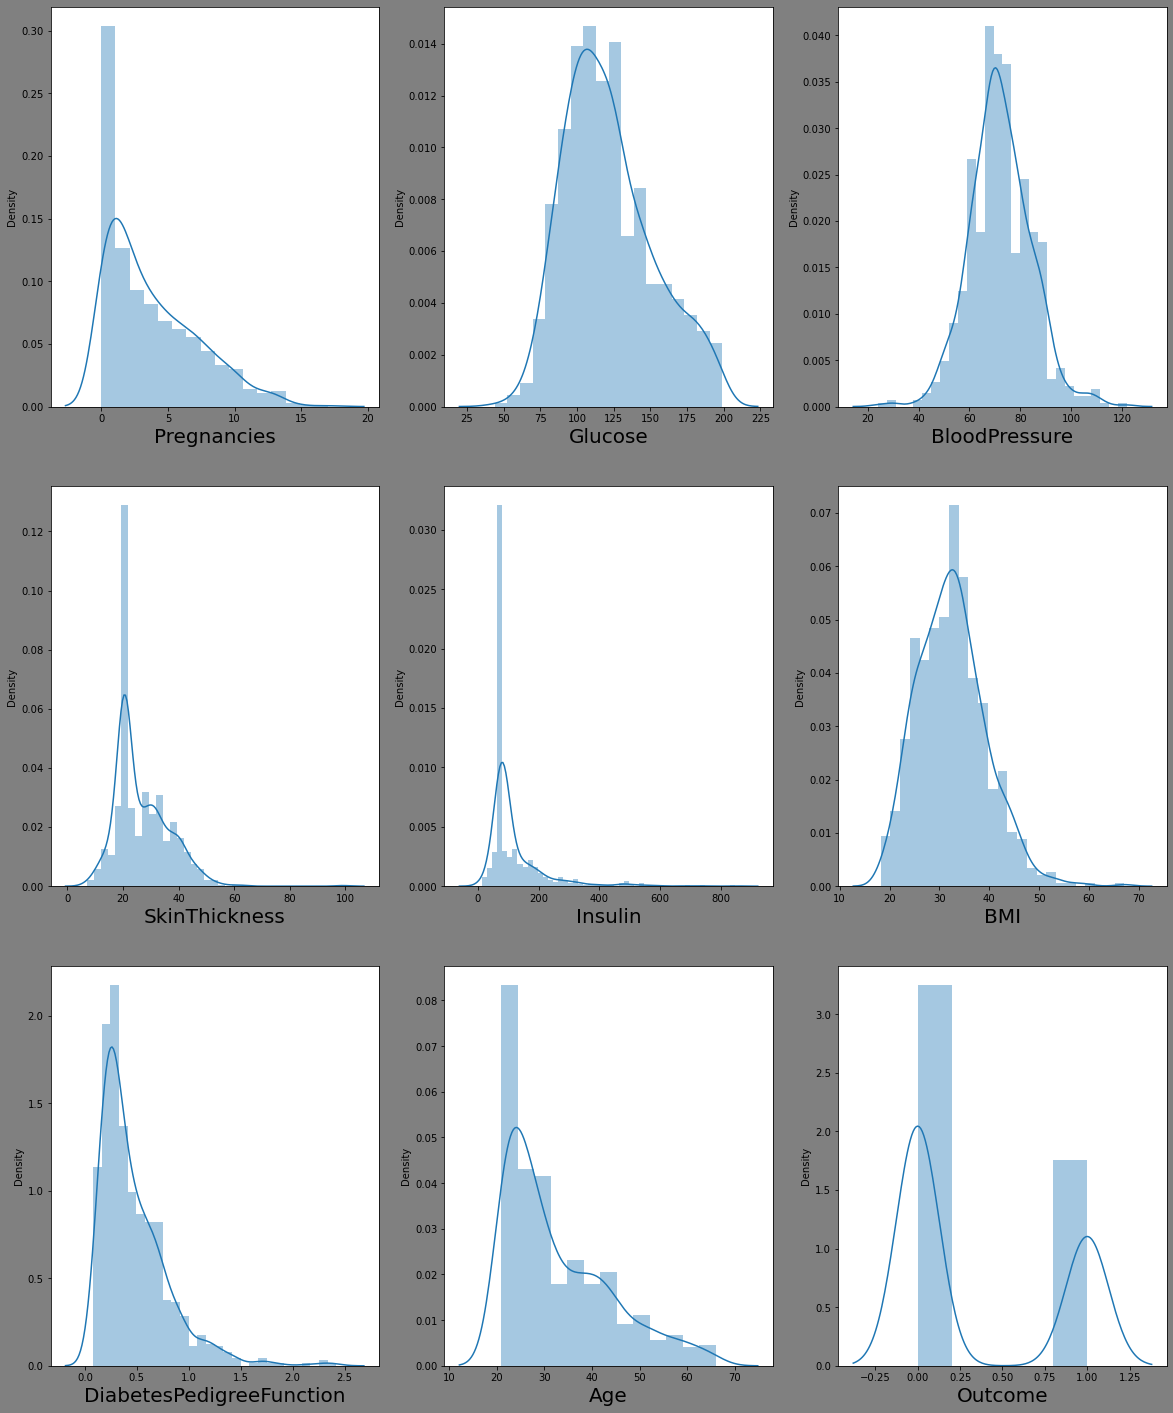

In [9]:
# Check the data distribution for every column
plt.figure(figsize = (20, 25), facecolor = 'grey')
plt_no = 1
for column in data_cleaned:
    if plt_no <= 9:
        ax = plt.subplot(3, 3, plt_no)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column, fontsize = 20)
    plt_no += 1
plt.show()

- The data looks much better now than before.

- Now let's visualize the relationship between independent variables and dependent variable.

In [10]:
X = data_cleaned.drop(columns = ['Outcome'])
y = data_cleaned['Outcome']

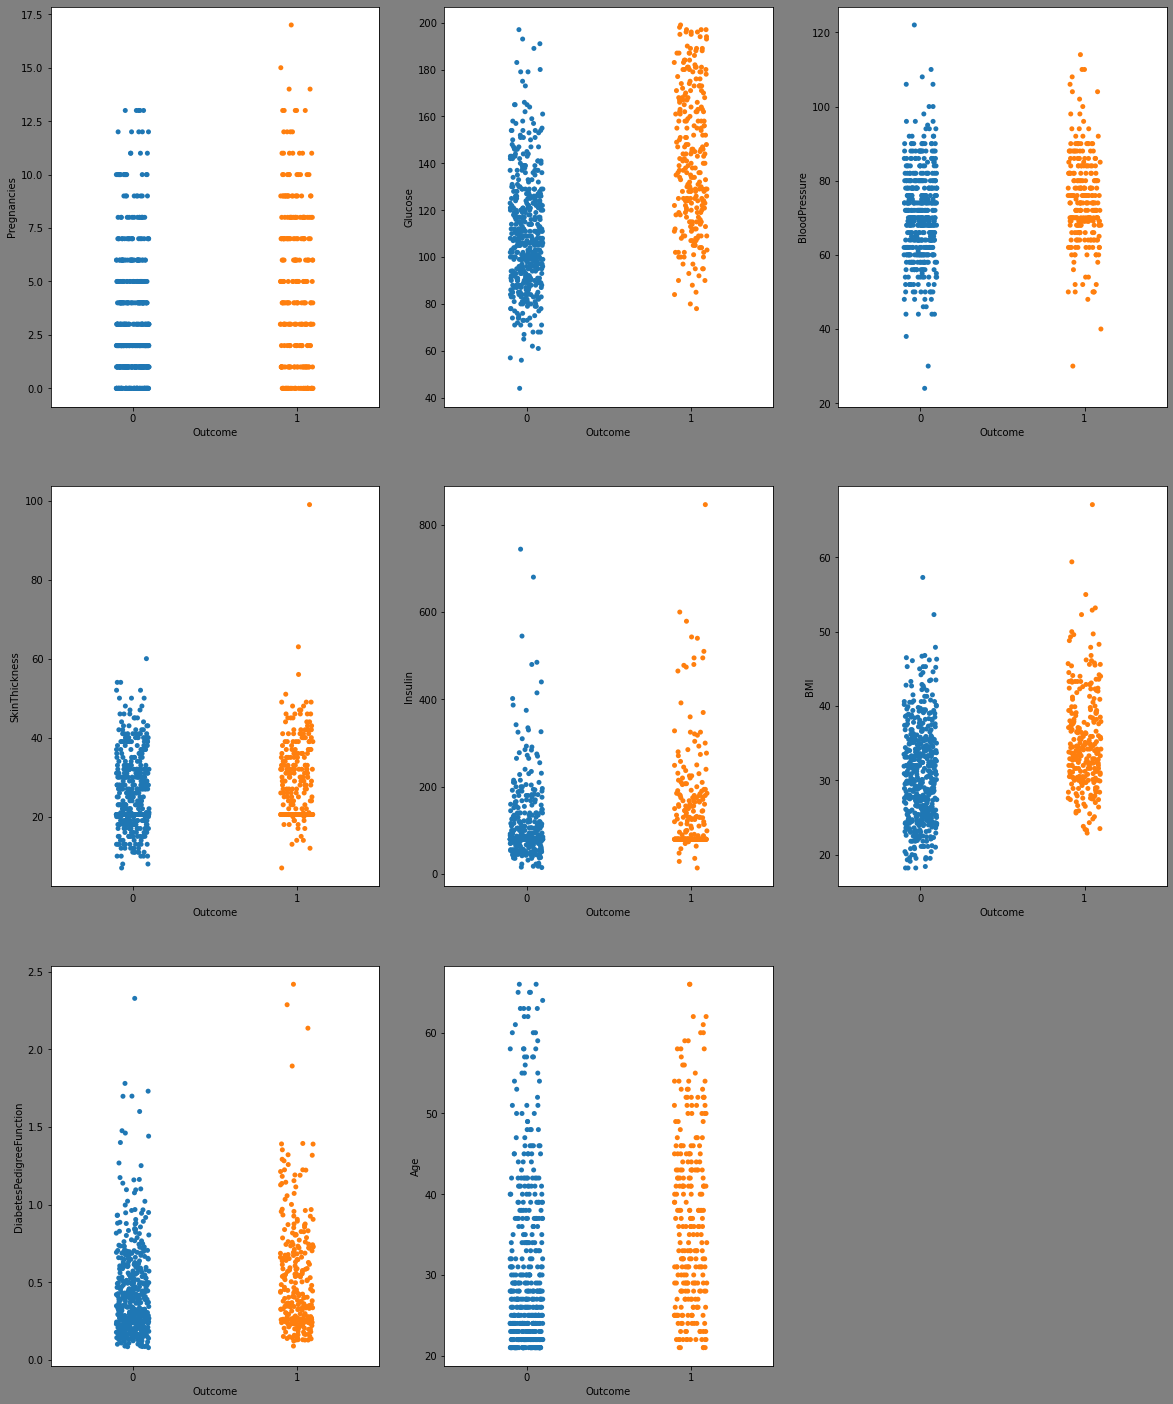

In [11]:
plt.figure(figsize = (20, 25), facecolor = 'grey')
plt_no = 1
for column in X: 
    if plt_no <= 9:
        ax = plt.subplot(3, 3, plt_no)
        sns.stripplot(y, X[column])
    plt_no += 1
plt.show()

- Independent variables is having great relationship with the dependent variable.
- Let's check for the multicollinearity in the dependent variables, before that, we should scale the data.

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

 - Now we will check for multicollinearity using VIF(Variance Inflation factor).

In [13]:
vif_df = pd.DataFrame()
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif_df['Features'] = X.columns
vif_df

,VIF,Features
0,1.484572,Pregnancies
1,1.354580,Glucose
2,1.247898,BloodPressure
3,1.455095,SkinThickness
4,1.264776,Insulin
5,1.551161,BMI
6,1.058847,DiabetesPedigreeFunction
7,1.680199,Age


- All the VIF values are less than 5 and are very low. That means no multicollinearity. 
- Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

## Split the dataset into Train and Test dataset

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 28)

## Model Creation

In [15]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [16]:
import pickle
# Saving the model and scaler in pickle format
with open('StandardScalar.sav', 'wb') as f:
    pickle.dump(scaler, f)
    
with open('LogModelPrediction.sav', 'wb') as f:
    pickle.dump(log_reg, f)

## Model Performance

### Accuracy

In [17]:
y_pred = log_reg.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7947368421052632

### Confusion Matrix

In [19]:
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat

array([[115,  16],
       [ 23,  36]], dtype=int64)

In [20]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

### Precision

In [21]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.8778625954198473

### Recall

In [22]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.8333333333333334

### F1 Score

In [23]:
# F1 Score
F1_Score = 2 * (Recall * Precision) / (Recall + Precision)
F1_Score

0.8550185873605949

### ROC 

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

### AUC

In [26]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7440160434726356

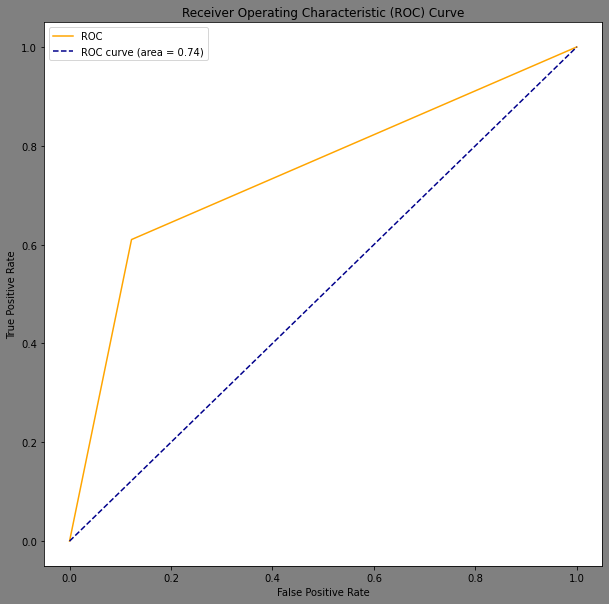

In [28]:
plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], color ='darkblue', linestyle = '--', label = 'ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()